## FID Lab

The following is all the code used in the FID lab:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [3]:
pip freeze

anyio @ file:///home/conda/feedstock_root/build_artifacts/bld/rattler-build_anyio_1742243108/work
APScheduler @ file:///home/conda/feedstock_root/build_artifacts/bld/rattler-build_apscheduler_1732499160/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1733311059102/work
argon2-cffi-bindings @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi-bindings_1725356572528/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1733584251875/work
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1733250440834/work
async-lru @ file:///home/conda/feedstock_root/build_artifacts/bld/rattler-build_async-lru_1742153708/work
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1741918516150/work
babel @ file:///home/conda/feedstock_root/build_artifacts/babel_1738490167835/work
beautifulsoup4 @ file:///home/conda/feedstock_root/build_artifacts/beautifulsoup4_1744783198182/work
bleach @ file:///home/conda/feedstock

In [2]:
# Styling for academic plots
sns.set_theme(style="whitegrid", context="talk")

In [3]:
df = pd.read_csv("fid_data.csv")

Basic sanity check:

In [4]:
print(df.head())
print(df.dtypes)

   Observation_No        Species  Grass Neighbours    SD Treatment  FID  \
0             101  Laughing dove  False        NaN  11.0   control  2.0   
1             102  Laughing dove  False        NaN  11.0   control  0.5   
2             103    Common myna  False          G  12.1   control  4.0   
3             104    Common myna   True        NaN  11.9   control  6.6   
4             105  Laughing dove  False        NaN   9.7     angle  NaN   

   Immediate_flight  
0             False  
1             False  
2             False  
3             False  
4             False  
Observation_No        int64
Species              object
Grass                  bool
Neighbours           object
SD                  float64
Treatment            object
FID                 float64
Immediate_flight       bool
dtype: object


## Data viability

In [5]:
df.isna().sum()

Observation_No       0
Species              0
Grass                0
Neighbours          32
SD                   0
Treatment            0
FID                  3
Immediate_flight     0
dtype: int64

<Axes: >

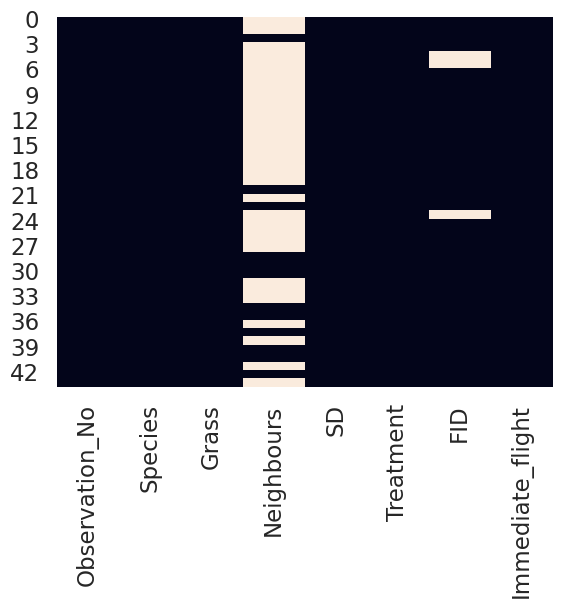

In [6]:
sns.heatmap(df.isna(), cbar=False)

In [32]:
df["FID"].describe()

count    41.000000
mean      3.595122
std       1.796378
min       0.500000
25%       2.000000
50%       3.500000
75%       4.400000
max       8.200000
Name: FID, dtype: float64

In [8]:
df["Species"].value_counts()

Species
Common myna      17
Monk parakeet    13
Upupa             8
Laughing dove     4
White wagtail     2
Name: count, dtype: int64

In [25]:
df_fid = df[df["FID"].notna()]

df_fid.groupby("Species")["FID"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Common myna,16.0,4.093750,1.584706,1.8,3.325,4.15,4.600,7.6
Laughing dove,2.0,1.250000,1.060660,0.5,0.875,1.25,1.625,2.0
Monk parakeet,13.0,2.469231,0.951652,1.0,1.800,2.50,3.000,4.5
Upupa,8.0,4.225000,1.842165,2.4,3.250,3.85,4.575,8.2
White wagtail,2.0,6.750000,1.060660,6.0,6.375,6.75,7.125,7.5


In [10]:
df_fid.groupby("Treatment")["FID"].describe()

,count,mean,std,min,25%,50%,75%,max
Treatment,,,,,,,,
angle,16.0,3.13125,1.464568,1.5,1.975,3.0,3.625,7.5
control,25.0,3.89200,1.949983,0.5,2.400,4.0,4.900,8.2


In [4]:
df["Immediate_flight"].value_counts(normalize=True)

Immediate_flight
False    0.863636
True     0.136364
Name: proportion, dtype: float64

In [5]:
pd.crosstab(df["Species"], df["Immediate_flight"], normalize="index")

Immediate_flight,False,True
Species,,
Common myna,0.941176,0.058824
Laughing dove,1.000000,0.000000
Monk parakeet,0.846154,0.153846
Upupa,0.875000,0.125000
White wagtail,0.000000,1.000000


In [6]:
df["FID"].isna().mean()

np.float64(0.06818181818181818)

In [7]:
pd.crosstab(df["Treatment"], df["FID"].isna(), normalize="index")

FID,False,True
Treatment,,
angle,0.842105,0.157895
control,1.000000,0.000000


In [8]:
df["SD"].describe()

count    44.000000
mean     11.156818
std       1.590144
min       7.400000
25%      10.000000
50%      11.050000
75%      12.000000
max      14.800000
Name: SD, dtype: float64

In [9]:
df.groupby("Treatment")["SD"].describe()

,count,mean,std,min,25%,50%,75%,max
Treatment,,,,,,,,
angle,19.0,11.010526,1.642794,8.6,9.85,10.7,11.8,14.5
control,25.0,11.268000,1.573669,7.4,10.00,11.8,12.0,14.8


Relationship between SD and FID:

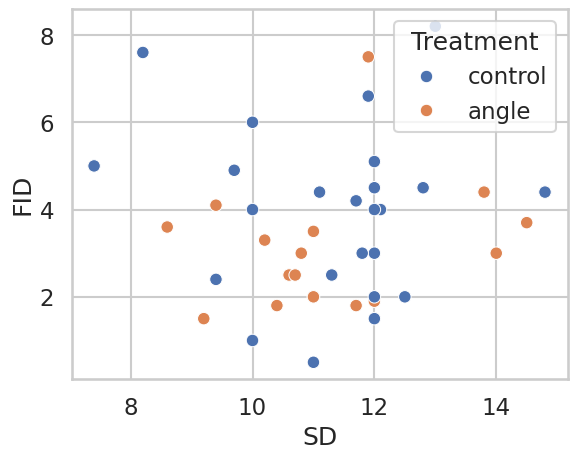

In [12]:
sns.scatterplot(data=df_fid, x="SD", y="FID", hue="Treatment")
plt.show()

Grass vs FID:

In [13]:
df_fid.groupby("Grass")["FID"].describe()

,count,mean,std,min,25%,50%,75%,max
Grass,,,,,,,,
False,7.0,2.857143,1.555482,0.5,2.0,2.40,4.100,4.9
True,34.0,3.747059,1.825449,1.0,2.5,3.55,4.475,8.2


Neighbours (only if sample sizes allow):

In [14]:
df_fid["Neighbours"].value_counts(dropna=False)

Neighbours
NaN    29
G      10
P       2
Name: count, dtype: int64

Distributional shape (FID is rarely normal):

<Axes: xlabel='FID', ylabel='Count'>

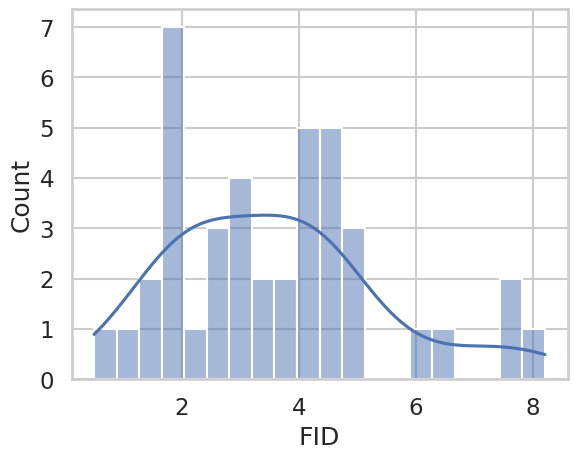

In [15]:
sns.histplot(df_fid["FID"], bins=20, kde=True)

## EDA

In [4]:
working_df = df.copy()

working_df["Day"] = np.select(
    [
        working_df["Observation_No"].between(101, 128),
        working_df["Observation_No"].between(229, 244)
    ],
    ["Day1", "Day2"],
    default="Other"
)

working_df["Day"].value_counts(dropna=False)

Day
Day1    28
Day2    16
Name: count, dtype: int64

In [19]:
pd.crosstab(working_df["Species"], working_df["Day"])

Day,Day1,Day2
Species,,
Common myna,15,2
Laughing dove,4,0
Monk parakeet,3,10
Upupa,4,4
White wagtail,2,0


In [20]:
pd.crosstab(working_df["Species"], working_df["Day"], normalize="columns")

Day,Day1,Day2
Species,,
Common myna,0.535714,0.125
Laughing dove,0.142857,0.000
Monk parakeet,0.107143,0.625
Upupa,0.142857,0.250
White wagtail,0.071429,0.000


In [21]:
working_df.groupby("Day")["Species"].nunique()

Day
Day1    5
Day2    3
Name: Species, dtype: int64

In [22]:
pd.crosstab(working_df["Day"], working_df["Immediate_flight"], normalize="index")

Immediate_flight,False,True
Day,,
Day1,0.892857,0.107143
Day2,0.812500,0.187500


In [23]:
pd.crosstab(working_df["Day"], working_df["FID"].isna(), normalize="index")

FID,False,True
Day,,
Day1,0.892857,0.107143
Day2,1.000000,0.000000


In [5]:
df_fid = working_df[working_df["FID"].notna()]

df_fid.groupby("Day")["FID"].describe()

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
Day1,25.0,3.74800,1.864832,0.5,2.000,4.00,4.5,7.6
Day2,16.0,3.35625,1.715019,1.0,2.375,3.15,4.0,8.2


In [28]:
df_fid.groupby(["Species", "Day"])["FID"].describe()

count      mean       std  min    25%   50%    75%  max
Species       Day                                                          
Common myna   Day1   14.0  4.135714  1.695971  1.8  2.875  4.30  4.800  7.6
              Day2    2.0  3.800000  0.282843  3.6  3.700  3.80  3.900  4.0
Laughing dove Day1    2.0  1.250000  1.060660  0.5  0.875  1.25  1.625  2.0
Monk parakeet Day1    3.0  2.266667  0.642910  1.8  1.900  2.00  2.500  3.0
              Day2   10.0  2.530000  1.047802  1.0  1.625  2.75  3.000  4.5
Upupa         Day1    4.0  3.250000  0.967815  2.4  2.475  3.10  3.875  4.4
              Day2    4.0  5.200000  2.108712  3.5  3.875  4.55  5.875  8.2
White wagtail Day1    2.0  6.750000  1.060660  6.0  6.375  6.75  7.125  7.5

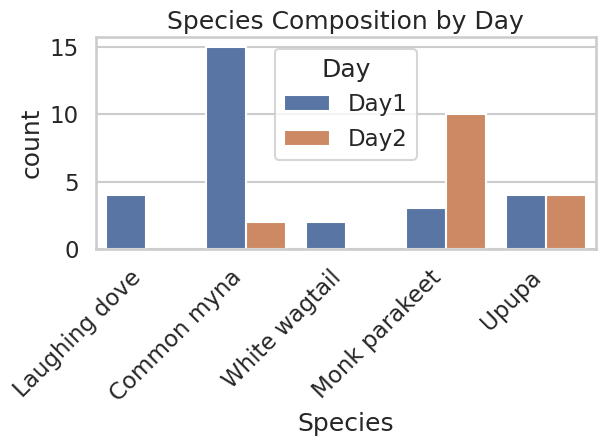

In [29]:
sns.countplot(data=working_df, x="Species", hue="Day")
plt.xticks(rotation=45, ha="right")
plt.title("Species Composition by Day")
plt.tight_layout()
plt.show()

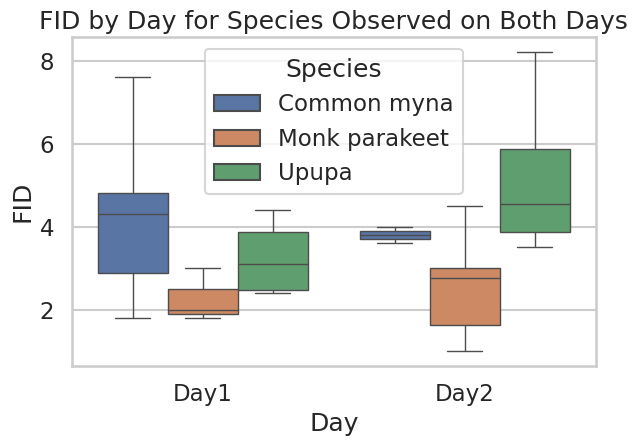

In [30]:
shared_species = (
    df_fid.groupby("Species")["Day"]
    .nunique()
    .loc[lambda x: x == 2]
    .index
)

df_shared = df_fid[df_fid["Species"].isin(shared_species)]

sns.boxplot(
    data=df_shared,
    x="Day",
    y="FID",
    hue="Species"
)
plt.title("FID by Day for Species Observed on Both Days")
plt.tight_layout()
plt.show()

In [31]:
working_df.groupby("Day")["SD"].describe()

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
Day1,28.0,11.089286,1.698875,7.4,9.875,11.00,12.0,14.8
Day2,16.0,11.275000,1.424781,8.6,10.150,11.55,12.0,14.0


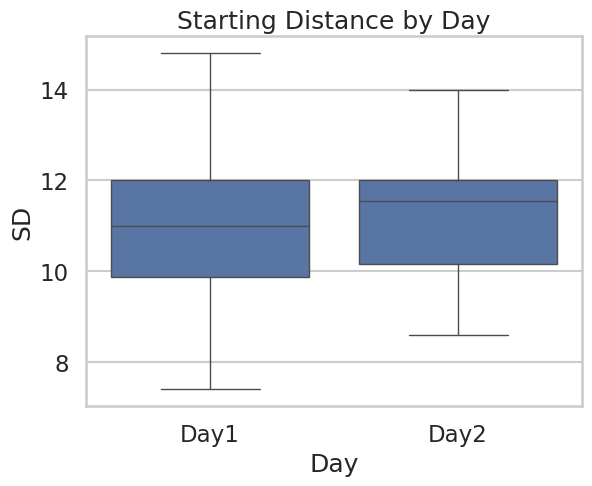

In [34]:
sns.boxplot(data=working_df, x="Day", y="SD")
plt.title("Starting Distance by Day")
plt.show()

FID as a function of Species:

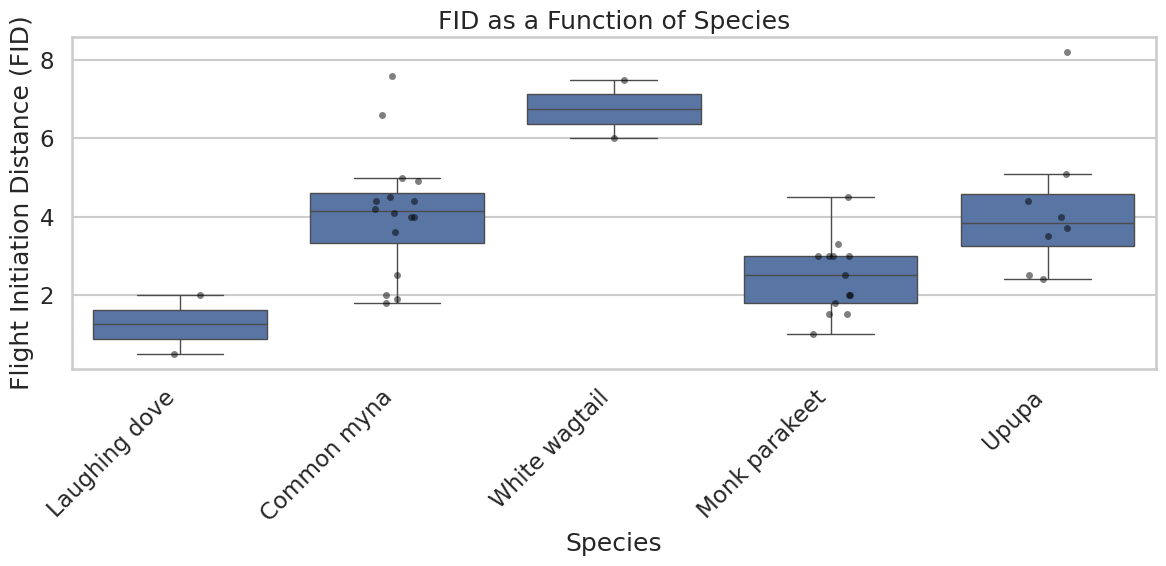

In [35]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="Species",
    y="FID",
    showfliers=False
)

sns.stripplot(
    data=df,
    x="Species",
    y="FID",
    color="black",
    alpha=0.5,
    jitter=True
)

plt.xlabel("Species")
plt.ylabel("Flight Initiation Distance (FID)")
plt.title("FID as a Function of Species")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

FID as a function of Treatment:

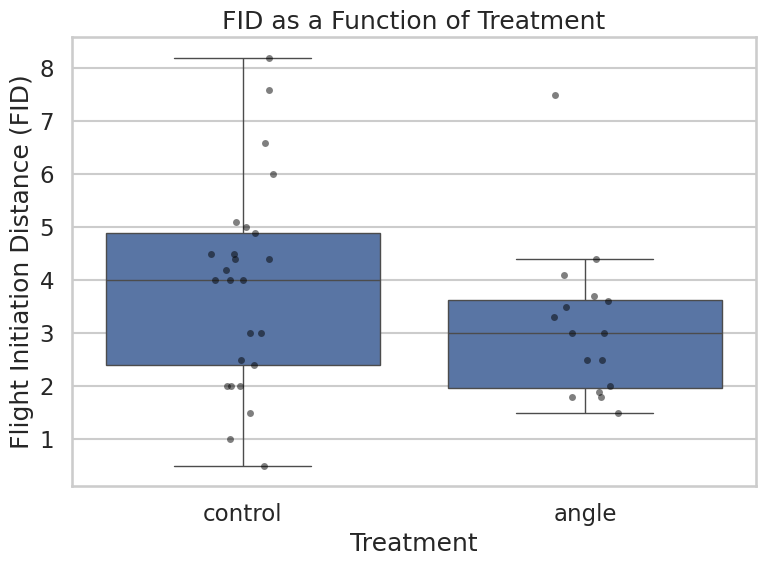

In [36]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df,
    x="Treatment",
    y="FID",
    showfliers=False
)

sns.stripplot(
    data=df,
    x="Treatment",
    y="FID",
    color="black",
    alpha=0.5,
    jitter=True
)

plt.xlabel("Treatment")
plt.ylabel("Flight Initiation Distance (FID)")
plt.title("FID as a Function of Treatment")

plt.tight_layout()
plt.show()

Optional: Violin plots (distribution-focused):

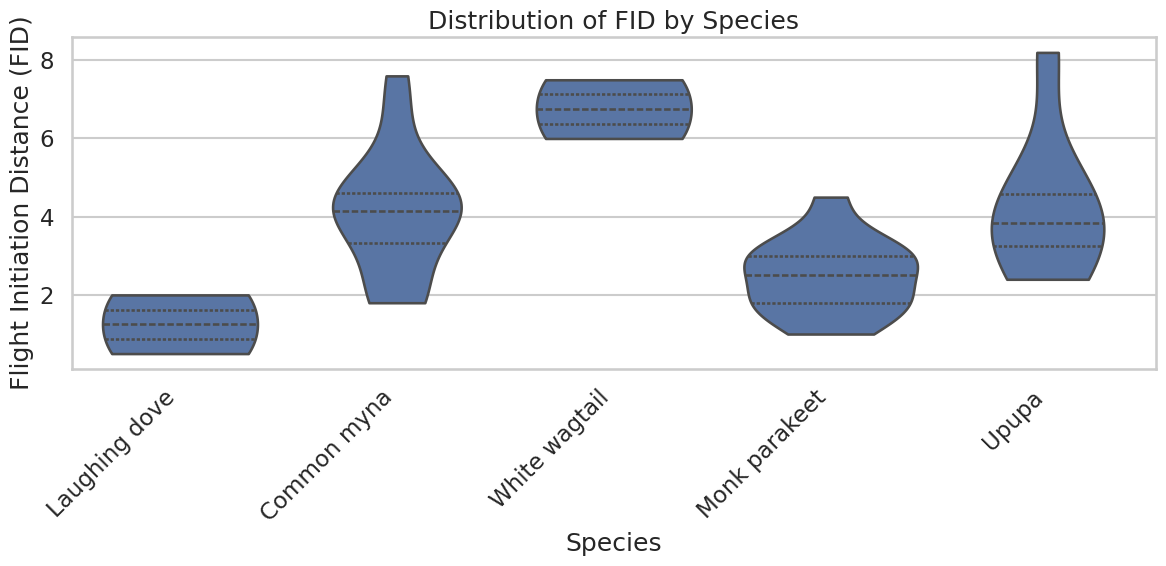

In [37]:
plt.figure(figsize=(12, 6))

sns.violinplot(
    data=df,
    x="Species",
    y="FID",
    inner="quartile",
    cut=0
)

plt.xlabel("Species")
plt.ylabel("Flight Initiation Distance (FID)")
plt.title("Distribution of FID by Species")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

Optional: Mean ± SE (classic behavioural-ecology style) (Summary statistics):

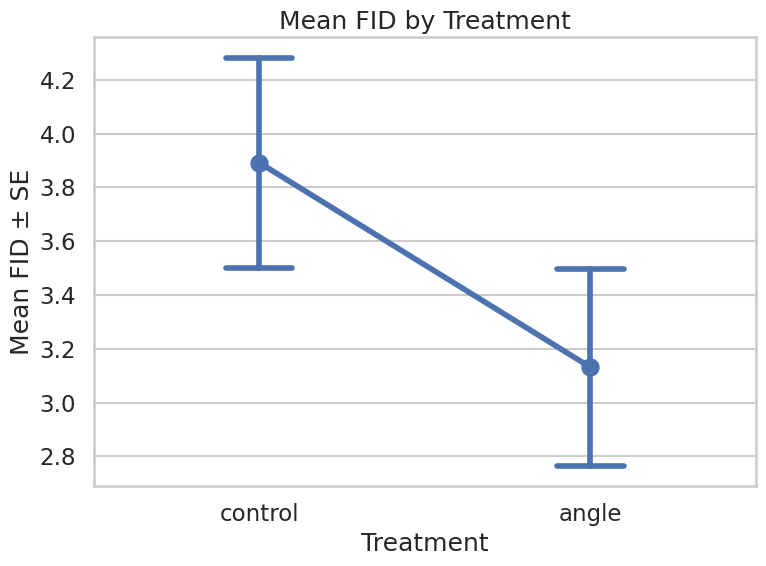

In [38]:
plt.figure(figsize=(8, 6))

sns.pointplot(
    data=df,
    x="Treatment",
    y="FID",
    errorbar="se",
    capsize=0.2
)

plt.xlabel("Treatment")
plt.ylabel("Mean FID ± SE")
plt.title("Mean FID by Treatment")

plt.tight_layout()
plt.show()

In [39]:
pd.crosstab(working_df["Treatment"], working_df["FID"].notna(), margins=True)

FID,False,True,All
Treatment,,,
angle,3,16,19
control,0,25,25
All,3,41,44


In [6]:
df_fled = working_df[working_df["FID"].notna()]

df_fled.groupby("Treatment")["FID"].describe()

,count,mean,std,min,25%,50%,75%,max
Treatment,,,,,,,,
angle,16.0,3.13125,1.464568,1.5,1.975,3.0,3.625,7.5
control,25.0,3.89200,1.949983,0.5,2.400,4.0,4.900,8.2


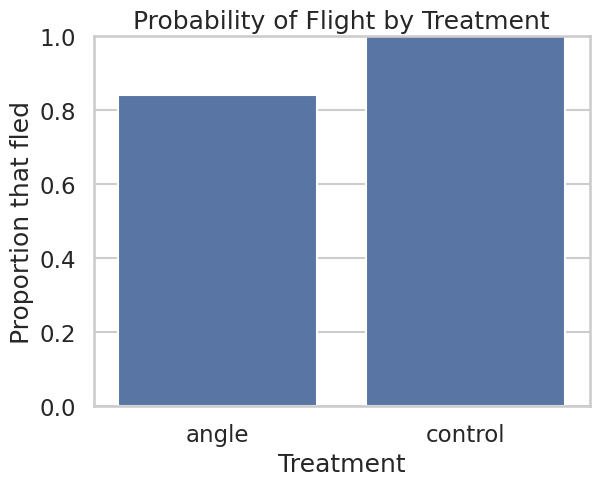

In [41]:
flight_rate = (
    working_df.assign(Fled=working_df["FID"].notna())
      .groupby("Treatment")["Fled"]
      .mean()
      .reset_index()
)

sns.barplot(data=flight_rate, x="Treatment", y="Fled")
plt.ylabel("Proportion that fled")
plt.ylim(0, 1)
plt.title("Probability of Flight by Treatment")
plt.show()


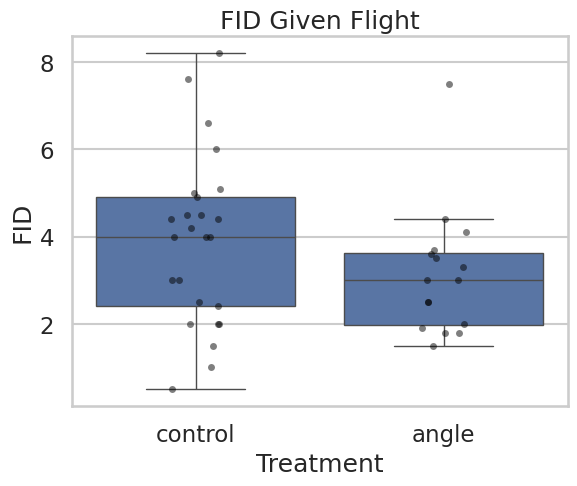

In [44]:
sns.boxplot(data=df_fled, x="Treatment", y="FID", showfliers=False)
sns.stripplot(data=df_fled, x="Treatment", y="FID", color="black", alpha=0.5)
plt.title("FID Given Flight")
plt.show()

## High FID analysis:

In [45]:
high_fid = working_df[working_df["FID"] > 5].copy()

high_fid.shape

(6, 9)

In [46]:
(working_df["FID"] > 5).mean()

np.float64(0.13636363636363635)

In [47]:
high_fid["Observation_No"].tolist()

[104, 107, 111, 122, 233, 239]

In [48]:
high_fid["Species"].value_counts()

Species
Common myna      2
White wagtail    2
Upupa            2
Name: count, dtype: int64

In [49]:
high_fid["Species"].value_counts(normalize=True)

Species
Common myna      0.333333
White wagtail    0.333333
Upupa            0.333333
Name: proportion, dtype: float64

In [50]:
pd.crosstab(high_fid["Treatment"], columns="count")

col_0,count
Treatment,
angle,1
control,5


In [51]:
pd.crosstab(
    working_df["Treatment"],
    working_df["FID"] > 5,
    normalize="index"
)

FID,False,True
Treatment,,
angle,0.947368,0.052632
control,0.800000,0.200000


In [52]:
pd.crosstab(
    high_fid["Immediate_flight"],
    columns="count"
)

col_0,count
Immediate_flight,
False,3
True,3


In [53]:
df.assign(
    HighFID=df["FID"] > 5
).groupby("HighFID")["SD"].describe()

,count,mean,std,min,25%,50%,75%,max
HighFID,,,,,,,,
False,38.0,11.155263,1.589101,7.4,10.000,11.0,12.000,14.8
True,6.0,11.166667,1.748904,8.2,10.475,11.9,11.975,13.0


In [54]:
pd.crosstab(
    df["Grass"],
    df["FID"] > 5,
    normalize="index"
)

FID,False,True
Grass,,
False,1.000000,0.000000
True,0.828571,0.171429


In [55]:
high_fid["Neighbours"].value_counts(dropna=False)

Neighbours
NaN    6
Name: count, dtype: int64

In [56]:
pd.crosstab(
    working_df["Day"],
    working_df["FID"] > 5,
    normalize="index"
)

FID,False,True
Day,,
Day1,0.857143,0.142857
Day2,0.875000,0.125000


In [7]:
df_model = df_fled.copy()

In [8]:
y = df_model["Treatment"]

In [19]:
X = df_model[
    ["FID", "SD", "Species", "Grass", "Neighbours", "Day", "Immediate_flight"]
]

In [20]:
numeric_features = ["FID", "SD"]
categorical_features = ["Species", "Grass", "Neighbours", "Day"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features),
    ]
)

In [12]:
model = LogisticRegression(
    penalty="l2",
    solver="liblinear",
    max_iter=1000
)

In [13]:
clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", model),
    ]
)

In [21]:
scores = cross_val_score(
    clf,
    X,
    y,
    cv=5,
    scoring="roc_auc"
)

scores, scores.mean()

/home/guy-dude/miniforge3/envs/myjlabenv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/guy-dude/miniforge3/envs/myjlabenv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(array([0.65      , 0.6       , 0.66666667, 0.46666667, 0.6       ]),
 np.float64(0.5966666666666667))

In [25]:
numeric_features_no_fid = ["SD"]
categorical_features_no_fid = ["Species", "Grass", "Neighbours", "Day", "Immediate_flight"]

preprocessor_no_fid = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features_no_fid),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features_no_fid),
    ]
)

clf_no_fid = Pipeline(
    steps=[
        ("preprocess", preprocessor_no_fid),
        ("model", LogisticRegression(penalty="l2", solver="liblinear", max_iter=1000)),
    ]
)

X_no_fid = df_model[
    ["SD", "Species", "Grass", "Neighbours", "Day", "Immediate_flight"]
]

scores_no_fid = cross_val_score(clf_no_fid, X_no_fid, y, cv=5, scoring="roc_auc")

scores_no_fid, scores_no_fid.mean()

/home/guy-dude/miniforge3/envs/myjlabenv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/guy-dude/miniforge3/envs/myjlabenv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(array([0.45      , 0.33333333, 0.66666667, 0.46666667, 0.73333333]),
 np.float64(0.53))